# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [71]:
# import the packages required for th
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
df_twitter_ar = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_ar.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [73]:
# Download the image prediction file using the link provided to Udacity students 
# import requests packages and the os 
import requests
import os
#Creating folder using python
folder_name = 'Image_Predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)

In [6]:
# check if the file has been downloaded successfully using .content on the response
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [74]:
# write this content into a tsv file:
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [75]:
# read the image prediction tsv file into a DataFrame image prediction
df_image_predictions = pd.read_csv('Image_Predictions/image-predictions.tsv', sep = '\t')
df_image_predictions.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [76]:
 # read the tweet_json file that has only the tweet_id, retweet_count and favorite_count into a DataFrame 
tweets_data = []
tweet_file = open('tweet-json copy', "r")
 for line in tweet_file:
     try:
         tweet = json.loads(line)
         tweets_data.append(tweet)
     except:
         continue   
 tweet_file.close()
 tweet_json = pd.DataFrame()
 tweet_json['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
 tweet_json['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
 tweet_json['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
 tweet_json.head(2)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual aseessment

In [77]:
# read the twitter_archive.csv file and assess it visually
df_twitter_ar

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [78]:
#  read the df_image_predictions table and assess it visually
df_image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [79]:
#  read the tweet_json table and assess it visually
tweet_json

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709           29611
17    888804989199671297           4559           26080
18    888554962724278272           3732           20290
19    888078434458587136           3653           22201
20    887705289381826560           5609           30779
21    887517139158093824          12082           46959
22    887473957103951883          18781           69871
23    887343217045368832          10737           34222
24    887101392804085760           6167           31061
25    886983233522544640           8084           35859
26    886736880519319552           3443           12306
27    886680336477933568           4610           22798
28    886366144734445568           3316           21524
29    886267009285017600              4             117
...                  ...            ...             ...
2324  666411507551481857            339             459
2325  666407126856765440             44             113
2326  666396247373291520             92             172
2327  666373753744588802            100             194
2328  666362758909284353            595             804
2329  666353288456101888             77             229
2330  666345417576210432            146             307
2331  666337882303524864             96             204
2332  666293911632134144            368             522
2333  666287406224695296             71             152
2334  666273097616637952             82             184
2335  666268910803644416             37             108
2336  666104133288665088           6871           14765
2337  666102155909144576             16              81
2338  666099513787052032             73             164
2339  666094000022159362             79             169
2340  666082916733198337             47             121
2341  666073100786774016            174             335
2342  666071193221509120             67             154
2343  666063827256086533            232             496
2344  666058600524156928             61             115
2345  666057090499244032            146             304
2346  666055525042405380            261             448
2347  666051853826850816            879            1253
2348  666050758794694657             60             136
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

### Programmatic assessment

Use the `.info()` method to check the completeness of values in each column and the data types of each column in all the data sets

In [80]:
df_twitter_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [81]:
#check for duplicated values in jpg_url column
sum(df_image_predictions.jpg_url.duplicated())

66

In [16]:
#check if all the rating_denominators are one value (10)
df_twitter_ar['rating_denominator'].nunique()

18

In [17]:
# check the numbers of rating_denominators present 
df_twitter_ar['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [18]:
# check for duplicated value in twitter_achive table
df_twitter_ar.duplicated().sum()

0

In [19]:
# check for duplicated value in the text column in twitter_achive table
df_twitter_ar.text.duplicated().sum()

0

In [20]:
# check for duplicated value in the tweet_id column in twitter_achive table
df_twitter_ar[df_twitter_ar.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [21]:
# check for duplicated value in tweet_json table
tweet_json.duplicated().sum()

0

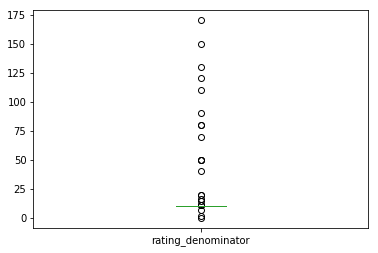

In [83]:
df_twitter_ar['rating_denominator'].plot.box();

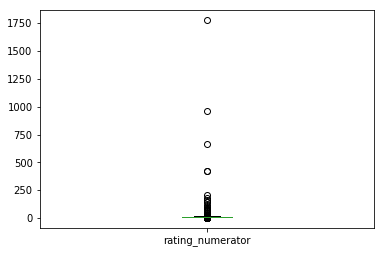

In [84]:
df_twitter_ar['rating_numerator'].plot.box();

In [85]:
# random checking of table
df_twitter_ar.loc[1100:1300]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1100  735648611367784448                    NaN                  NaN   
1101  735635087207878657                    NaN                  NaN   
1102  735274964362878976                    NaN                  NaN   
1103  735256018284875776                    NaN                  NaN   
1104  735137028879360001                    NaN                  NaN   
1105  734912297295085568                    NaN                  NaN   
1106  734787690684657664                    NaN                  NaN   
1107  734776360183431168                    NaN                  NaN   
1108  734559631394082816                    NaN                  NaN   
1109  733828123016450049                    NaN                  NaN   
1110  733822306246479872                    NaN                  NaN   
1111  733482008106668032                    NaN                  NaN   
1112  733460102733135873                    NaN                  NaN   
1113  733109485275860992                    NaN                  NaN   
1114  732732193018155009                    NaN                  NaN   
1115  732726085725589504                    NaN                  NaN   
1116  732585889486888962                    NaN                  NaN   
1117  732375214819057664                    NaN                  NaN   
1118  732005617171337216                    NaN                  NaN   
1119  731285275100512256                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1121  730924654643314689                    NaN                  NaN   
1122  730573383004487680                    NaN                  NaN   
1123  730427201120833536                    NaN                  NaN   
1124  730211855403241472                    NaN                  NaN   
1125  730196704625098752                    NaN                  NaN   
1126  729854734790754305                    NaN                  NaN   
1127  729838605770891264           7.291135e+17         4.196984e+09   
1128  729823566028484608                    NaN                  NaN   
1129  729463711119904772                    NaN                  NaN   
...                  ...                    ...                  ...   
1271  709409458133323776                    NaN                  NaN   
1272  709225125749587968                    NaN                  NaN   
1273  709207347839836162                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1275  709179584944730112                    NaN                  NaN   
1276  709158332880297985                    NaN                  NaN   
1277  709042156699303936                    NaN                  NaN   
1278  708853462201716736                    NaN                  NaN   
1279  708845821941387268                    NaN                  NaN   
1280  708834316713893888                    NaN                  NaN   
1281  708810915978854401                    NaN                  NaN   
1282  708738143638450176                    NaN                  NaN   
1283  708711088997666817                    NaN                  NaN   
1284  708479650088034305                    NaN                  NaN   
1285  708469915515297792                    NaN                  NaN   
1286  708400866336894977                    NaN                  NaN   
1287  708356463048204288                    NaN                  NaN   
1288  708349470027751425                    NaN                  NaN   
1289  708149363256774660                    NaN                  NaN   
1290  708130923141795840                    NaN                  NaN   
1291  708119489313951744                    NaN                  NaN   
1292  708109389455101952                    NaN                  NaN   
1293  708026248782585858                    NaN                  NaN   
1294  707995814724026368                    NaN         

In [86]:
# random checking
df_twitter_ar.loc[1120]

tweet_id                                                     731156023742988288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-05-13 16:15:54 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Say hello to this unbelievably well behaved sq...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/731156023...
rating_numerator                                                            204
rating_denominator                                                          170
name                                    

In [87]:
# random checking
df_twitter_ar.loc[1121]

tweet_id                                                     730924654643314689
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-05-13 00:56:32 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          We only rate dogs. Pls stop sending non-canine...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/730924654...
rating_numerator                                                              9
rating_denominator                                                           10
name                                    

In [88]:
# check for rating_denominators with value not equal to 10
twitter_dog_deno = df_twitter_ar[df_twitter_ar['rating_denominator'] != 10]
twitter_dog_deno[['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id                                               text  \
313   835246439529840640  @jonnysun @Lin_Manuel ok jomny I know you're e...   
342   832088576586297345           @docmisterio account started on 11/15/15   
433   820690176645140481  The floofs have been released I repeat the flo...   
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
784   775096608509886464  RT @dog_rates: After so many requests, this is...   
902   758467244762497024  Why does this never happen at my front door......   
1068  740373189193256964  After so many requests, this is Bretagne. She ...   
1120  731156023742988288  Say hello to this unbelievably well behaved sq...   
1165  722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
1202  716439118184652801  This is Bluebert. He just saw that both #Final...   
1228  713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
1254  710658690886586372  Here's a brigade of puppers. All look very pre...   
1274  709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
1351  704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
1433  697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1598  686035780142297088  Yes I do realize a rating of 4/20 would've bee...   
1634  684225744407494656  Two sneaky puppers were not initially seen, mo...   
1635  684222868335505415  Someone help the girl is being mugged. Several...   
1662  682962037429899265  This is Darrel. He just robbed a 7/11 and is i...   
1663  682808988178739200  I'm aware that I could've said 20/16, but here...   
1779  677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   

      rating_numerator  rating_denominator  
313                960                   0  
342                 11                  15  
433                 84                  70  
516                 24                   7  
784                  9                  11  
902                165                 150  
1068                 9                  11  
1120               204                 170  
1165                 4                  20  
1202                50                  50  
1228                99                  90  
1254                80                  80  
1274                45                  50  
1351                60                  50  
1433                44                  40  
1598                 4                  20  
1634               143                 130  
1635               121                 110  
1662                 7                  11  
1663                20                  16  
1779               144                 120  
1843                88                  80  
2335                 1                   2

### Quality issues
   **twitter-archive-enhanced.csv**
   
1.Dog names; some dogs have `a`, `this`,`unacceptable`,  `the`or `an` as a name

2.presence of retweets (duplicates of the actual tweets)

3.The HTML tags in the urls in **source column**

4.Missing values in:
 > **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp**

   
5.The data type of the **timestamp** is object. 

   
6.presence of the time zone

   
7.some values in **rating_denominator** are not 10
 


   **df_image_predictions.tsv**

8.Duplicated data values in **df_image_predictions jpg_url** 

9.The names of the breeds of dog in P1, P2 and P3 in the **df_image_predictions** data are not consistent with casing.

10.Some of the column names are not clear enough to represent data.

11.Some images used to represent dog breeds in image prediction table are not dog images.

### Tidiness issues
1.The stages of the dogs are separated in columns ((i.e. doggo, floofer, pupper, and puppo)

2.The rating numerator and denominator are in separate columns

3.The  df_image_predictions data sets, the tweet_json and the twitter-archive-enhanced data sets are in separate tables where as the **df_image_predictions** and **tweet_json** are parts of the same observational units as the **twitter-archive-enhanced** data sets 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [89]:
# Make copies of original pieces of data
df_twitter_ar_clean = df_twitter_ar.copy()
image_predictions_clean = df_image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: Dog names; some dogs have a, this, unacceptable, the or an as  names

#### Define:Correct the dog names by using `str.replace` to replace the letters by **none** and regex function ` '^[a-z]+' `to select out the unwanted characters.

#### Code

In [90]:
df_twitter_ar_clean.name = df_twitter_ar_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [91]:
df_twitter_ar_clean.query('name == "unacceptable"')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [92]:
df_twitter_ar_clean.name.value_counts()

None         854
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
Buddy          7
Toby           7
Daisy          7
Bailey         7
Jax            6
Scout          6
Leo            6
Milo           6
Oscar          6
Koda           6
Bella          6
Dave           6
Stanley        6
Jack           6
Rusty          6
Bentley        5
Chester        5
Phil           5
George         5
            ... 
Binky          1
Billy          1
Tater          1
Jangle         1
Strider        1
Asher          1
Sailor         1
Ed             1
Maya           1
Pilot          1
Timmy          1
Benny          1
Grizzie        1
Ace            1
Alexander      1
Socks          1
Jerome         1
Mark           1
Cheryl         1
Tiger          1
Kenzie         1
Alf            1
Scruffers      1
Rontu          1
Humphrey       1
Dante          1
Snickers       1
Kollin        

### Issue #2:Presence of retweets

#### Define: delete retweets

####  Code

In [93]:
df_twitter_ar_clean = df_twitter_ar_clean[np.isnan(df_twitter_ar_clean.retweeted_status_id)]

In [94]:
# Verify the no non-null entires left
df_twitter_ar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [95]:
# Remove the following columns:
df_twitter_ar_clean = df_twitter_ar_clean.drop(['retweeted_status_id', \
                                  'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test 

In [96]:
df_twitter_ar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue #3:The HTML tags in the urls in source column

#### Define:  We drop the source column since it is not needed for analysis as well

#### Code

In [97]:
# drop the source column
df_twitter_ar_clean = df_twitter_ar_clean.drop(['source'],1)

#### Test

In [98]:
df_twitter_ar_clean.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

### Issue #4:Missing values in:

in_reply_to_status_id, in_reply_to_user_id

#### Define :Drop the columns with high number of mising values.

#### Code

In [99]:
# drop these columns
df_twitter_ar_clean = df_twitter_ar_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], 1)

#### Test

In [100]:
# check for missing values 
df_twitter_ar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #5/6:The data type of the **timestamp** is object / Presence of the time zone

#### Define :Change the data type to datetime using `to_datetime` method, and also remove the timezone from the timestamp by invoking `.astype(str).str` on the timestamp column and define the index to slice out.

#### Code

In [101]:
# convert the data type of timestamp from string to datetime
df_twitter_ar_clean['timestamp'] = pd.to_datetime(df_twitter_ar_clean['timestamp'].astype(str).str[:19])

#### Test the data type

In [102]:
# cross-check the timestamp data type
df_twitter_ar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


#### Test if the time zone has been removed

In [103]:
# check if the time zone has been removed
df_twitter_ar_clean.head(5)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Issue #7: Some values in **rating_denominator** are not 10

#### Define : Check if their ratings are in their texts and correct them. Drop those that do not have their ratings in their texts. 

#### Code

In [104]:
# These opration was cancelled for those that do not have their ratings in their texts
print(df_twitter_ar_clean['text'][313]) 
print(df_twitter_ar_clean['text'][1068]) 
print(df_twitter_ar_clean['text'][1165]) 
print(df_twitter_ar_clean['text'][1202])
print(df_twitter_ar_clean['text'][1662])
print(df_twitter_ar_clean['text'][2335]) 
# these are ones that have their ratings in their texts

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [105]:
# correct the rating_denominators
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 835246439529840640, ['rating_denominator']] = 10
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 775096608509886464, ['rating_denominator']] = 10
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [106]:
# correct the rating_numerators
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 835246439529840640, ['rating_numerator']] = 13
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 775096608509886464, ['rating_numerator']] = 14
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
df_twitter_ar_clean.loc[df_twitter_ar_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

#### Test 1 

In [107]:
# check if the corrected ones are still there
twitter_dog_deno = df_twitter_ar_clean[df_twitter_ar_clean['rating_denominator'] != 10]
twitter_dog_deno[['tweet_id','text','rating_numerator','rating_denominator']] 

tweet_id                                               text  \
342   832088576586297345           @docmisterio account started on 11/15/15   
433   820690176645140481  The floofs have been released I repeat the flo...   
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
902   758467244762497024  Why does this never happen at my front door......   
1120  731156023742988288  Say hello to this unbelievably well behaved sq...   
1228  713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
1254  710658690886586372  Here's a brigade of puppers. All look very pre...   
1274  709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
1351  704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
1433  697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1598  686035780142297088  Yes I do realize a rating of 4/20 would've bee...   
1634  684225744407494656  Two sneaky puppers were not initially seen, mo...   
1635  684222868335505415  Someone help the girl is being mugged. Several...   
1663  682808988178739200  I'm aware that I could've said 20/16, but here...   
1779  677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   

      rating_numerator  rating_denominator  
342                 11                  15  
433                 84                  70  
516                 24                   7  
902                165                 150  
1120               204                 170  
1228                99                  90  
1254                80                  80  
1274                45                  50  
1351                60                  50  
1433                44                  40  
1598                 4                  20  
1634               143                 130  
1635               121                 110  
1663                20                  16  
1779               144                 120  
1843                88                  80

In [108]:
# Drop those that do not have their rating_denominators in their texts
df_twitter_ar_clean = df_twitter_ar_clean.drop(df_twitter_ar_clean[df_twitter_ar_clean.rating_denominator> 10].index)
df_twitter_ar_clean = df_twitter_ar_clean.drop(df_twitter_ar_clean[df_twitter_ar_clean.rating_denominator< 10].index)

#### Test 2

In [109]:
# check if there is still any rating_denominator that is not 10
twitter_dog_deno = df_twitter_ar_clean[df_twitter_ar_clean['rating_denominator'] != 10]
twitter_dog_deno[['tweet_id','text','rating_numerator','rating_denominator']] 

Empty DataFrame
Columns: [tweet_id, text, rating_numerator, rating_denominator]
Index: []

In [110]:
df_twitter_ar_clean.rating_denominator.unique()

array([10])

### Issue #8: Duplicated data values in df_image_predictions jpg_url

#### Define: Drop the duplicated values in the df_image_prediction table

In [111]:
# drop the duplicated values and keep the first row
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='first')

#### Test

In [113]:
# check if there are still duplicated values
sum(image_predictions_clean.jpg_url.duplicated())

0

### Issue #9:The names of the breeds of dog in P1, P2 and P3 in the image_predictions data are not consistent.

#### Define: We make all the breed names start with upper case by invoking `str.capitalize()` on the three columns

#### Code

In [114]:
# capitalize the first letter of dog breeds in all the prediction columns
image_predictions_clean['p1'] = image_predictions_clean.p1.str.capitalize()
image_predictions_clean['p2'] = image_predictions_clean.p2.str.capitalize()
image_predictions_clean['p3'] = image_predictions_clean.p3.str.capitalize()

#### Test

In [115]:
image_predictions_clean.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              Collie   
1        1                 Redbone  0.506826    True  Miniature_pinscher   
2        1         German_shepherd  0.596461    True            Malinois   
3        1     Rhodesian_ridgeback  0.408143    True             Redbone   
4        1      Miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              Box_turtle  0.933012   False          Mud_turtle   
7        1                    Chow  0.692517    True     Tibetan_mastiff   
8        1           Shopping_cart  0.962465   False     Shopping_basket   
9        1        Miniature_poodle  0.201493    True            Komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   Bloodhound  0.116197    True  
3  0.360687    True           Miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_swiss_mountain_dog  0.016199    True  
6  0.045885   False                     Terrapin  0.017885   False  
7  0.058279    True                     Fur_coat  0.054449   False  
8  0.014594   False             Golden_retriever  0.007959    True  
9  0.192305    True  Soft-coated_wheaten_terrier  0.082086    True

### Issue #10: Some of the column names are  not clear enough to represent data.

#### Define: The column names (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog) are replaced with their definitions  given in the Project Motivation page.

#### Code: 

In [116]:
image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_prediction_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

#### Test

In [117]:
image_predictions_clean.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num        first_prediction  first_confidence  first_prediction_dog  \
0        1  Welsh_springer_spaniel          0.465074                  True   
1        1                 Redbone          0.506826                  True   
2        1         German_shepherd          0.596461                  True   
3        1     Rhodesian_ridgeback          0.408143                  True   
4        1      Miniature_pinscher          0.560311                  True   

    second_prediction  second_confidence  second_dog     third_prediction  \
0              Collie           0.156665        True    Shetland_sheepdog   
1  Miniature_pinscher           0.074192        True  Rhodesian_ridgeback   
2            Malinois           0.138584        True           Bloodhound   
3             Redbone           0.360687        True   Miniature_pinscher   
4          Rottweiler           0.243682        True             Doberman   

   third_confidence  third_dog  
0          0.061428       True  
1          0.072010       True  
2          0.116197       True  
3          0.222752       True  
4          0.154629       True

### Tidiness issues

### Issue #1: The stages of the dogs are separated in columns ((i.e. doggo, floofer, pupper, and puppo)

#### Define: Extract the values of the four columns into a single column called `dog_stage`(newly created) .

#### Code

In [118]:
# Extract the text from the columns into the new dog_type colunn
# use a for loop to replace all the 'None' before cat
dog_stage = ['doggo','pupper', 'floofer', 'puppo' ]
df_twitter_ar_clean.doggo.replace('None', '', inplace=True)
df_twitter_ar_clean.doggo.replace(np.NaN, '', inplace=True)

df_twitter_ar_clean.pupper.replace('None', '', inplace=True)
df_twitter_ar_clean.pupper.replace(np.NaN, '', inplace=True)

df_twitter_ar_clean.floofer.replace('None', '', inplace=True)
df_twitter_ar_clean.floofer.replace(np.NaN, '', inplace=True)

df_twitter_ar_clean.puppo.replace('None', '', inplace=True)
df_twitter_ar_clean.puppo.replace(np.NaN, '', inplace=True)


In [119]:
# use cat to combine
df_twitter_ar_clean['dog_stage'] = df_twitter_ar_clean.doggo.str.cat(df_twitter_ar_clean.floofer).str.cat(df_twitter_ar_clean.pupper).str.cat(df_twitter_ar_clean.puppo)


In [120]:
df_twitter_ar_clean.loc[df_twitter_ar_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_ar_clean.loc[df_twitter_ar_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_ar_clean.loc[df_twitter_ar_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#### Test

In [121]:
df_twitter_ar_clean.groupby(["dog_stage", "doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

dog_stage  doggo  floofer  pupper  puppo  count
0                                                  1815
1           doggo  doggo                             75
2  doggo, floofer  doggo  floofer                     1
3   doggo, pupper  doggo           pupper            10
4    doggo, puppo  doggo                   puppo      1
5         floofer         floofer                     9
6          pupper                  pupper           224
7           puppo                          puppo     24

In [122]:
# drop the four columns since they have been extracted into a new column
df_twitter_ar_clean = df_twitter_ar_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis = 1)

In [124]:
df_twitter_ar_clean.groupby(["dog_stage"]).size().reset_index().rename(columns={0: "count"})

dog_stage  count
0                   1815
1           doggo     75
2  doggo, floofer      1
3   doggo, pupper     10
4    doggo, puppo      1
5         floofer      9
6          pupper    224
7           puppo     24

In [126]:
df_twitter_ar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2159 non-null int64
timestamp             2159 non-null datetime64[ns]
text                  2159 non-null object
expanded_urls         2104 non-null object
rating_numerator      2159 non-null int64
rating_denominator    2159 non-null int64
name                  2159 non-null object
dog_stage             2159 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 151.8+ KB


### Issue #2:The rating numerator and denominator are in separate columns

#### Define: Convert the two columns into float data type and  
#### Create a new column called `dog_rating` by dividing the numerator rating by the denominator rating since 

##### Each variable forms a column
##### Each observation forms a row

#### Code

In [127]:
# convert the two columns by using astype
df_twitter_ar_clean['rating_numerator'] = df_twitter_ar_clean['rating_numerator'].astype(float)
df_twitter_ar_clean['rating_denominator'] = df_twitter_ar_clean['rating_denominator'].astype(float)

however, there are some ratings that have their rating numerators as decimal

In [128]:
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in df_twitter_ar_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [129]:
# Print the indices of the ratings above (have decimal)
ratings_decimals_index

[45, 695, 763, 1689, 1712]

In [130]:
#Correctly converting the above decimal ratings to float
df_twitter_ar_clean.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
df_twitter_ar_clean.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
df_twitter_ar_clean.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
df_twitter_ar_clean.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])
df_twitter_ar_clean.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[4])

In [131]:
# Testing the indices 
df_twitter_ar_clean.loc[45]

tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
dog_stage                                                              
Name: 45, dtype: object

In [132]:
# Create a new column called dog_rating  by dividing the numerator rating by the denominator rating 
df_twitter_ar_clean['dog_rating'] = df_twitter_ar_clean['rating_numerator'] / df_twitter_ar_clean['rating_denominator']

#### Test

In [133]:
df_twitter_ar_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name dog_stage  dog_rating  
0                10.0   Phineas                   1.3  
1                10.0     Tilly                   1.3  
2                10.0    Archie                   1.2  
3                10.0     Darla                   1.3  
4                10.0  Franklin                   1.2

In [134]:
# now remove the rating_numerator and rating_denominator by droping the two columns
df_twitter_ar_clean = df_twitter_ar_clean.drop(['rating_numerator', 'rating_denominator'],1)

In [135]:
df_twitter_ar_clean.head(5)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls      name dog_stage  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas             
1  https://twitter.com/dog_rates/status/892177421...     Tilly             
2  https://twitter.com/dog_rates/status/891815181...    Archie             
3  https://twitter.com/dog_rates/status/891689557...     Darla             
4  https://twitter.com/dog_rates/status/891327558...  Franklin             

   dog_rating  
0         1.3  
1         1.3  
2         1.2  
3         1.3  
4         1.2

In [136]:
df_twitter_ar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id         2159 non-null int64
timestamp        2159 non-null datetime64[ns]
text             2159 non-null object
expanded_urls    2104 non-null object
name             2159 non-null object
dog_stage        2159 non-null object
dog_rating       2159 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 214.9+ KB


### issue 3: The df_image_predictions data sets, the tweet_json and the twitter-archive-enhanced data sets are in separate tables where as the df_image_predictions and tweet_json are parts of the same observational units as the twitter-archive-enhanced data sets

### Define : merge the three tables together to form a single observational unit

#### Code1

In [137]:
# merge the df_twitter_ar_clean and image_predictions_clean together via the tweet_id
df_clean = pd.merge(df_twitter_ar_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [138]:
df_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls      name dog_stage  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas             
1  https://twitter.com/dog_rates/status/892177421...     Tilly             
2  https://twitter.com/dog_rates/status/891815181...    Archie             
3  https://twitter.com/dog_rates/status/891689557...     Darla             
4  https://twitter.com/dog_rates/status/891327558...  Franklin             

   dog_rating                                          jpg_url  img_num  \
0         1.3  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1         1.3  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2         1.2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3         1.3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4         1.2  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   

  first_prediction  first_confidence first_prediction_dog   second_prediction  \
0           Orange          0.097049                False               Bagel   
1        Chihuahua          0.323581                 True            Pekinese   
2        Chihuahua          0.716012                 True            Malamute   
3      Paper_towel          0.170278                False  Labrador_retriever   
4           Basset          0.555712                 True    English_springer   

   second_confidence second_dog             third_prediction  \
0           0.085851      False                       Banana   
1           0.090647       True                     Papillon   
2           0.078253       True                       Kelpie   
3           0.168086       True                      Spatula   
4           0.225770       True  German_short-haired_pointer   

   third_confidence third_dog  
0          0.076110     False  
1          0.068957      True  
2          0.031379      True  
3          0.040836     False  
4          0.175219      True

#### Code2

In [139]:
# merge the tweet_json with (the df_twitter_ar_clean and image_predictions_clean already merged together)
df_cleaned = pd.merge(df_clean, 
                      tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [140]:
df_cleaned.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls      name dog_stage  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas             
1  https://twitter.com/dog_rates/status/892177421...     Tilly             
2  https://twitter.com/dog_rates/status/891815181...    Archie             
3  https://twitter.com/dog_rates/status/891689557...     Darla             
4  https://twitter.com/dog_rates/status/891327558...  Franklin             

   dog_rating                                          jpg_url  img_num  \
0         1.3  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1         1.3  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2         1.2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3         1.3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4         1.2  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   

  first_prediction  first_confidence first_prediction_dog   second_prediction  \
0           Orange          0.097049                False               Bagel   
1        Chihuahua          0.323581                 True            Pekinese   
2        Chihuahua          0.716012                 True            Malamute   
3      Paper_towel          0.170278                False  Labrador_retriever   
4           Basset          0.555712                 True    English_springer   

   second_confidence second_dog             third_prediction  \
0           0.085851      False                       Banana   
1           0.090647       True                     Papillon   
2           0.078253       True                       Kelpie   
3           0.168086       True                      Spatula   
4           0.225770       True  German_short-haired_pointer   

   third_confidence third_dog  retweet_count  favorite_count  
0          0.076110     False           8853           39467  
1          0.068957      True           6514           33819  
2          0.031379      True           4328           25461  
3          0.040836     False           8964           42908  
4          0.175219      True           9774           41048

### Remove the data that are not needed

In [141]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 20 columns):
tweet_id                2159 non-null int64
timestamp               2159 non-null datetime64[ns]
text                    2159 non-null object
expanded_urls           2104 non-null object
name                    2159 non-null object
dog_stage               2159 non-null object
dog_rating              2159 non-null float64
jpg_url                 1981 non-null object
img_num                 1981 non-null float64
first_prediction        1981 non-null object
first_confidence        1981 non-null float64
first_prediction_dog    1981 non-null object
second_prediction       1981 non-null object
second_confidence       1981 non-null float64
second_dog              1981 non-null object
third_prediction        1981 non-null object
third_confidence        1981 non-null float64
third_dog               1981 non-null object
retweet_count           2159 non-null int64
favorite_count          215

In [142]:
# drop expanded urls
df_cleaned.drop([
                  'expanded_urls'], axis = 1, inplace=True)

In [143]:
df_cleaned.tail(5)

tweet_id           timestamp  \
2154  666049248165822465 2015-11-16 00:24:50   
2155  666044226329800704 2015-11-16 00:04:52   
2156  666033412701032449 2015-11-15 23:21:54   
2157  666029285002620928 2015-11-15 23:05:30   
2158  666020888022790149 2015-11-15 22:32:08   

                                                   text  name dog_stage  \
2154  Here we have a 1949 1st generation vulpix. Enj...  None             
2155  This is a purebred Piers Morgan. Loves to Netf...  None             
2156  Here is a very happy pup. Big fan of well-main...  None             
2157  This is a western brown Mitsubishi terrier. Up...  None             
2158  Here we have a Japanese Irish Setter. Lost eye...  None             

      dog_rating                                          jpg_url  img_num  \
2154         0.5  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0   
2155         0.6  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg      1.0   
2156         0.9  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg      1.0   
2157         0.7  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0   
2158         0.8  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0   

            first_prediction  first_confidence first_prediction_dog  \
2154      Miniature_pinscher          0.560311                 True   
2155     Rhodesian_ridgeback          0.408143                 True   
2156         German_shepherd          0.596461                 True   
2157                 Redbone          0.506826                 True   
2158  Welsh_springer_spaniel          0.465074                 True   

       second_prediction  second_confidence second_dog     third_prediction  \
2154          Rottweiler           0.243682       True             Doberman   
2155             Redbone           0.360687       True   Miniature_pinscher   
2156            Malinois           0.138584       True           Bloodhound   
2157  Miniature_pinscher           0.074192       True  Rhodesian_ridgeback   
2158              Collie           0.156665       True    Shetland_sheepdog   

      third_confidence third_dog  retweet_count  favorite_count  
2154          0.154629      True             41             111  
2155          0.222752      True            147             311  
2156          0.116197      True             47             128  
2157          0.072010      True             48             132  
2158          0.061428      True            532            2535

In [144]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 19 columns):
tweet_id                2159 non-null int64
timestamp               2159 non-null datetime64[ns]
text                    2159 non-null object
name                    2159 non-null object
dog_stage               2159 non-null object
dog_rating              2159 non-null float64
jpg_url                 1981 non-null object
img_num                 1981 non-null float64
first_prediction        1981 non-null object
first_confidence        1981 non-null float64
first_prediction_dog    1981 non-null object
second_prediction       1981 non-null object
second_confidence       1981 non-null float64
second_dog              1981 non-null object
third_prediction        1981 non-null object
third_confidence        1981 non-null float64
third_dog               1981 non-null object
retweet_count           2159 non-null int64
favorite_count          2159 non-null int64
dtypes: datetime64[ns](1), f

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [157]:
#Store the clean DataFrame in a CSV file
df_cleaned.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.What are the most popular dog breeds? 

2.What is the correlation between the **retweet_count** and **favourite_count**?  

3.The dog stage with the highest rating by mean

4.The most popular dog name

5.The most popular dog stage

6.The dog stage with the highest favourite tweet count


### Most Popular Dog Breeds

#### The most popular dog breeds in the first, second and third prescription 

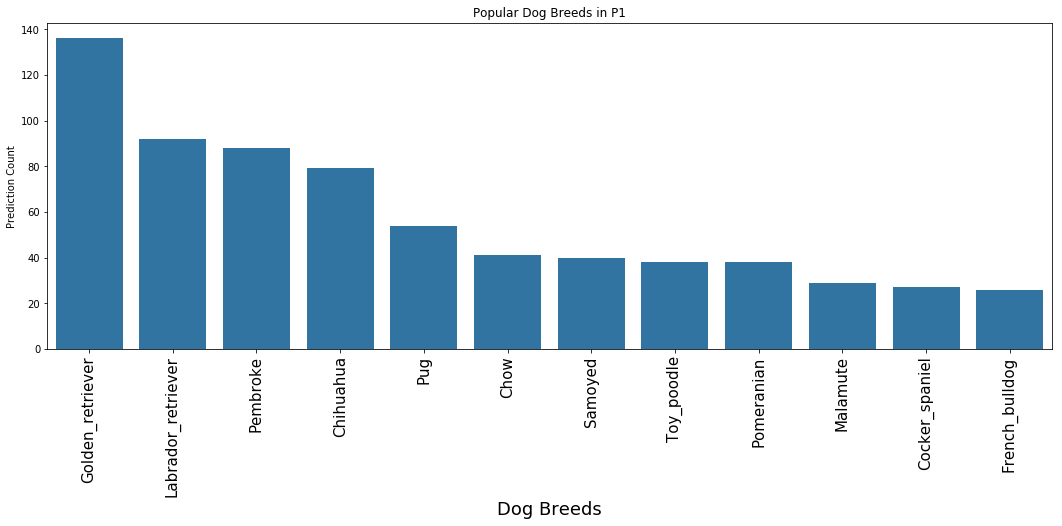

In [158]:
# use bar chart to discover the most popular dog breeds in the first prescription by considering 12 breeds 
plt.figure(figsize = (18,6))
ax = sns.barplot(x = df_cleaned['first_prediction'].value_counts()[0:12].index,
            y =df_cleaned['first_prediction'].value_counts()[0:12],
            data = df_cleaned,color = sns.color_palette()[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count");
plt.title("Popular Dog Breeds in P1");

>In the first prediction, **Golden_retriever** is the most popular dog

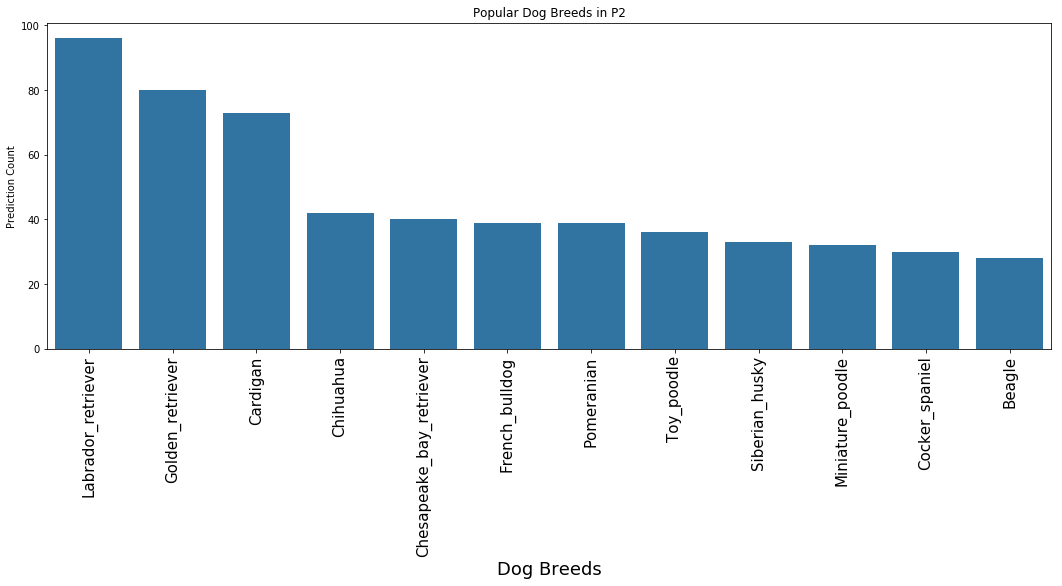

In [159]:
# use bar chart to discover the most popular dog breeds in the second prescription by considering 12 breeds 
plt.figure(figsize = (18,6))
ax = sns.barplot(x = df_cleaned['second_prediction'].value_counts()[0:12].index,
            y =df_cleaned['second_prediction'].value_counts()[0:12],
            data = df_cleaned,color = sns.color_palette()[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count");
plt.title("Popular Dog Breeds in P2");

>In the second prediction, **Labrador_retriever** is the most popular dog

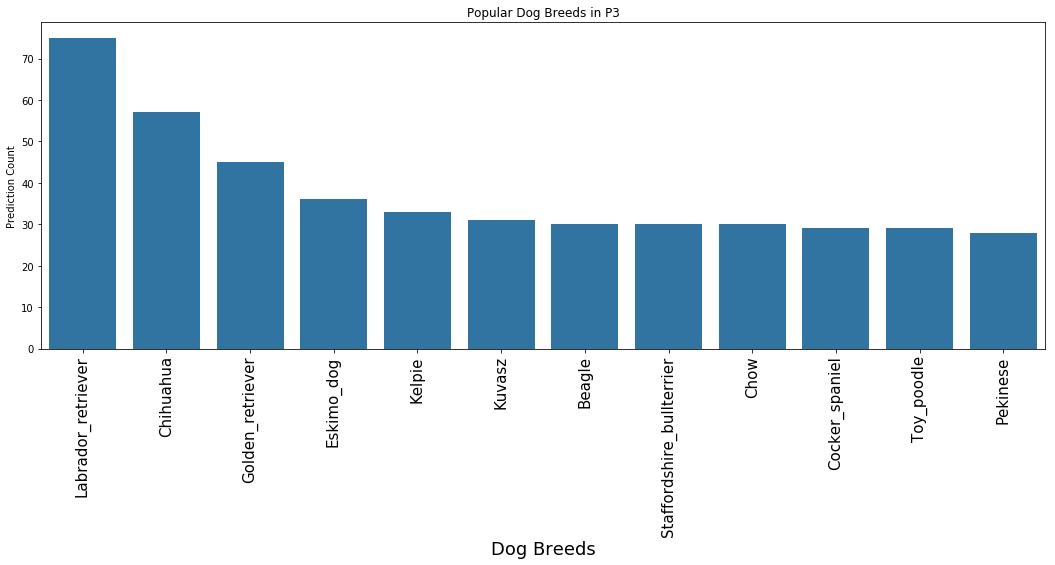

In [160]:
# use bar chart to discover the most popular dog breeds in the third prescription by considering 12 breeds 
plt.figure(figsize = (18,6))
ax = sns.barplot(x = df_cleaned['third_prediction'].value_counts()[0:12].index,
            y =df_cleaned['third_prediction'].value_counts()[0:12],
            data = df_cleaned,color = sns.color_palette()[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count");
plt.title("Popular Dog Breeds in P3");

>In the third prediction, **Labrador_retriever** is the most popular dog

In [173]:
# check the first twelve most popular dog breeds in the first prediction
df_cleaned['first_prediction'].value_counts()[0:12]

Golden_retriever      136
Labrador_retriever     92
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Toy_poodle             38
Pomeranian             38
Malamute               29
Cocker_spaniel         27
French_bulldog         26
Name: first_prediction, dtype: int64

In [174]:
# check the first twelve most popular dog breeds in the second prediction
df_cleaned['second_prediction'].value_counts()[0:12]

Labrador_retriever          96
Golden_retriever            80
Cardigan                    73
Chihuahua                   42
Chesapeake_bay_retriever    40
French_bulldog              39
Pomeranian                  39
Toy_poodle                  36
Siberian_husky              33
Miniature_poodle            32
Cocker_spaniel              30
Beagle                      28
Name: second_prediction, dtype: int64

In [175]:
# check the first twelve most popular dog breeds in the third prediction
df_cleaned['third_prediction'].value_counts()[0:12]

Labrador_retriever           75
Chihuahua                    57
Golden_retriever             45
Eskimo_dog                   36
Kelpie                       33
Kuvasz                       31
Beagle                       30
Staffordshire_bullterrier    30
Chow                         30
Cocker_spaniel               29
Toy_poodle                   29
Pekinese                     28
Name: third_prediction, dtype: int64

**retweet count and favorite count**

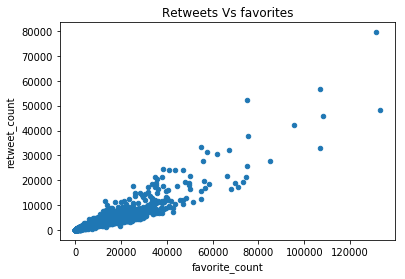

In [161]:
# make a scatter plot between retweet count and favorite count 
df_cleaned.plot.scatter(y="retweet_count", x="favorite_count");
plt.title('Retweets Vs favorites');

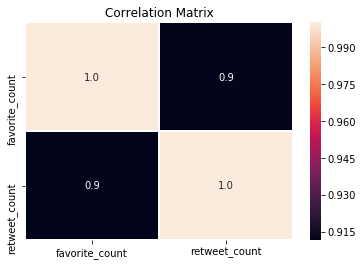

In [163]:
# Using correlation matrix to determine the regression coefficient r between favorite count and retweet count
sns.heatmap(df_cleaned[[ 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix');

There is a positive correlation between the **retweet_count** and **favourite_count** with the regression coefficient `r` of **0.9**

In [164]:
# determine the dog stage with the highest rating by mean
df_cleaned.groupby('dog_stage')['dog_rating'].mean().idxmax()

'doggo, puppo'

>The dog stage with the highest rating by mean is a combined **doogo, puppo** stage

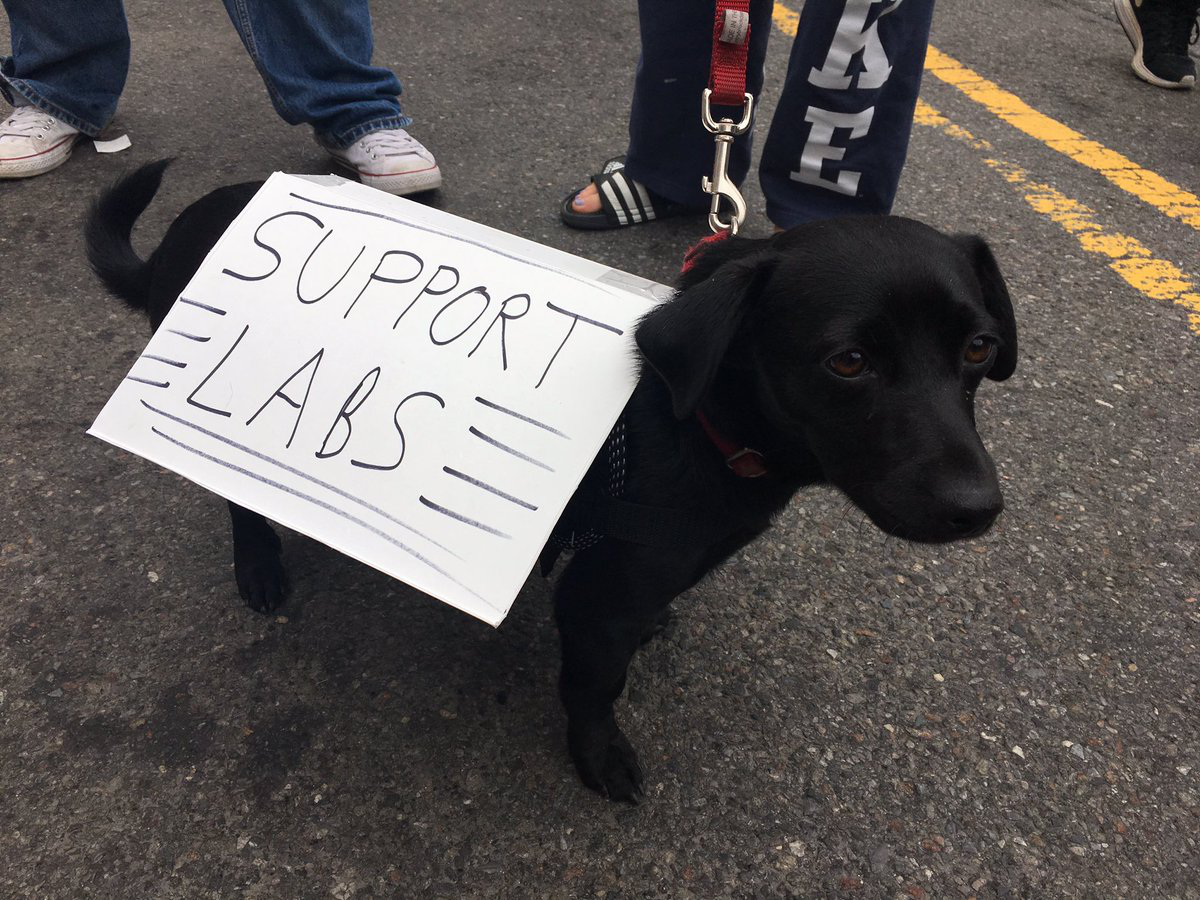

In [165]:
# import the packages required for visualizing the dog images
from PIL import Image
from io import BytesIO

# visualize the image of a dog at doogo, puppo stage
dog_stage = df_cleaned.query('dog_stage == "doggo, puppo"')

url = dog_stage.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

<h1><center>A dog of floofer stage</center></h1

#### The most popular dog name

In [166]:
# check the value count for the dog names
df_cleaned['name'].value_counts()

None         769
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Daisy          7
Toby           7
Jax            6
Oscar          6
Bella          6
Stanley        6
Bailey         6
Bo             6
Koda           6
Dave           5
Rusty          5
Buddy          5
Scout          5
Milo           5
Bentley        5
Louis          5
Leo            5
Chester        5
Jack           4
Maggie         4
            ... 
Geno           1
Hubertson      1
Mollie         1
Molly          1
Scruffers      1
Chelsea        1
Alf            1
Kenzie         1
Hurley         1
Hamrick        1
Bluebert       1
Colin          1
Siba           1
Lipton         1
Puff           1
Bungalo        1
Emanuel        1
Jameson        1
Pilot          1
Timmy          1
Benny          1
Grizzie        1
Ace            1
Alexander      1
Socks          1
Jerome         1
Mark           1
Craig         

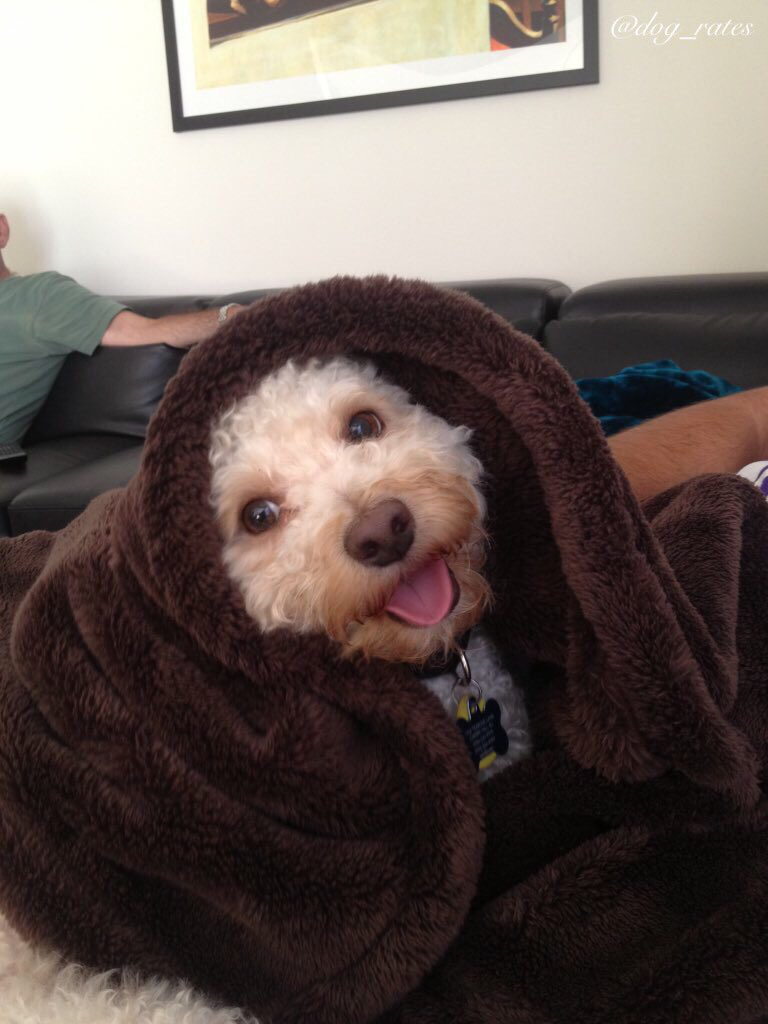

In [167]:
# visualize the image of a dog called Charlie
dog_name = df_cleaned.query('name == "Charlie"')

url = dog_name.jpg_url.iloc[10]
r = requests.get(url)
Image.open(BytesIO(r.content))

<h1><center>One of the dogs named Charlie</center></h1

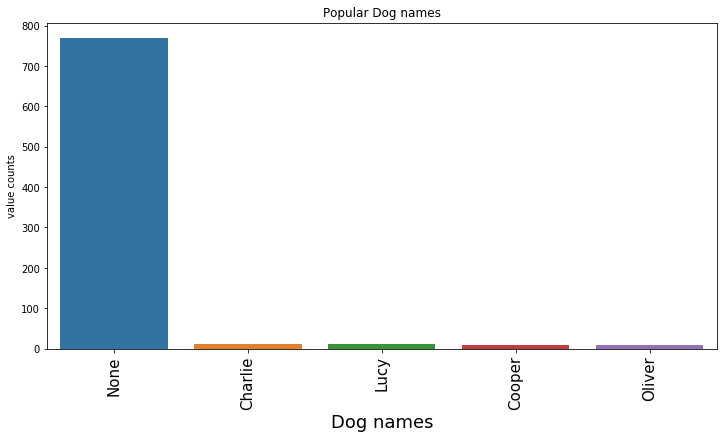

In [168]:
# use bar chart to discover the most popular dog breeds in the third prescription 
plt.figure(figsize = (12,6))
ax = sns.barplot(x = df_cleaned['name'].value_counts()[0:5].index,
            y =df_cleaned['name'].value_counts()[0:5],
            data = df_cleaned);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog names",fontsize = 18);
plt.ylabel("value counts");
plt.title("Popular Dog names");

>The most popular dogs **Charlie** are **Lucy**

#### The most popular dog stage

In [169]:
# check for dog stage value count
df_twitter_ar_clean['dog_stage'].value_counts()

                  1815
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

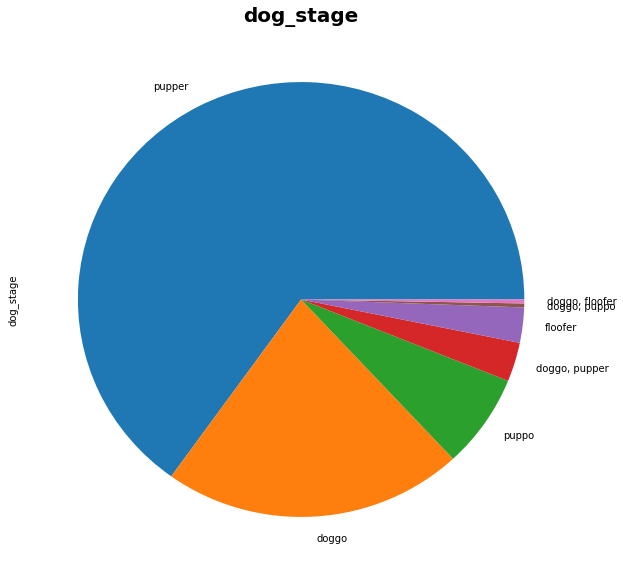

In [178]:
import pandas as pd
df_cleaned = pd.read_csv('twitter_archive_master.csv')
plt.figure(figsize = (10,10))
df_cleaned['dog_stage'].value_counts().plot(kind = 'pie')
plt.ylabel = ('')
plt.title('dog_stage', weight = 'bold', fontsize = 20);

The most popular dog stage is **Pupper**

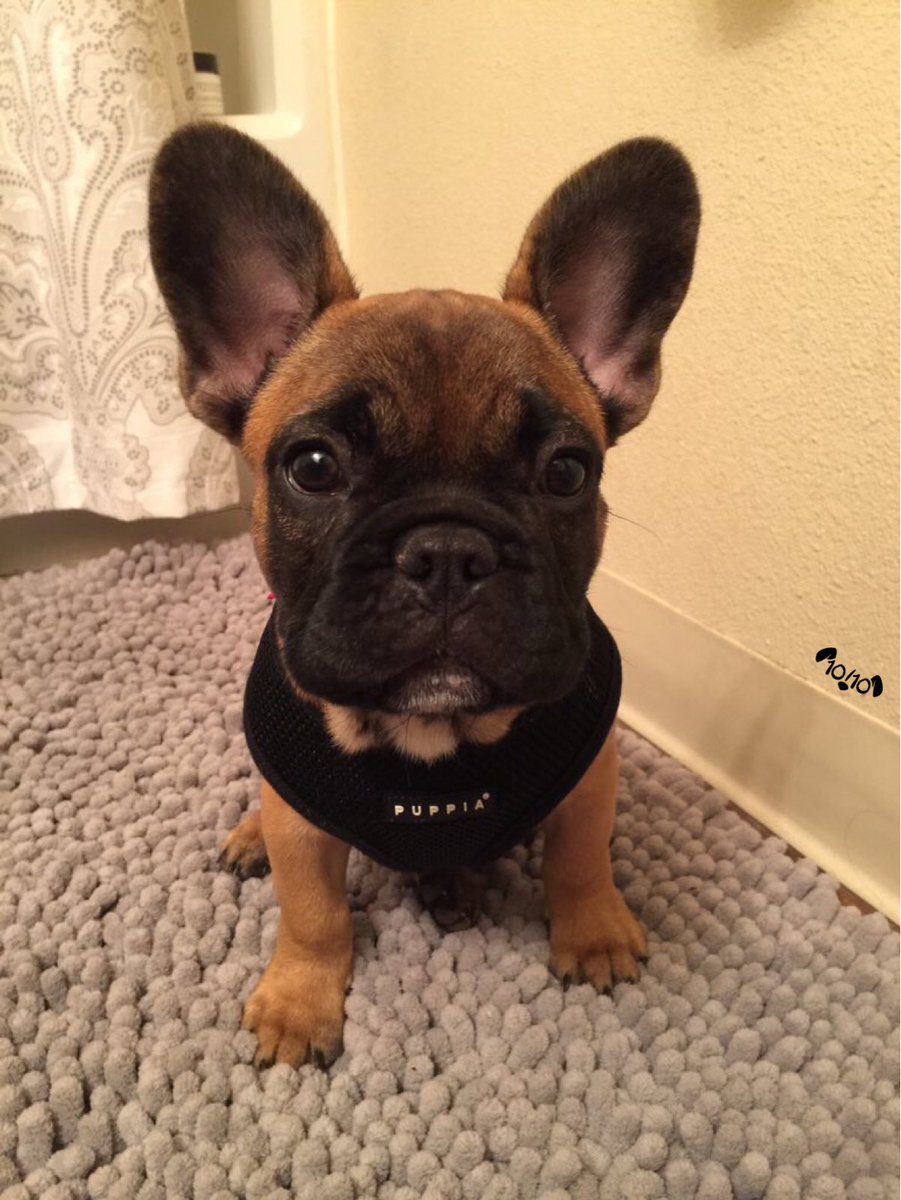

In [171]:
# visualize the image of a dog at pupper stage
dog_stage = df_cleaned.query('dog_stage == "pupper"')

url = dog_stage.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

<h1><center>A dog at pupper stage </center></h1

#### The dog stage with the highest favorite tweet count

In [172]:
# the dog stage with the highest favorite count
df_cleaned.groupby('dog_stage')['favorite_count'].max()

dog_stage
doggo             131075
doggo, floofer     17169
doggo, pupper      44619
doggo, puppo       47844
floofer            33345
pupper            106827
puppo             132810
Name: favorite_count, dtype: int64

The dog stage with the highest favorite tweet count is **Puppo**